In [ ]:
# The following codes generates a plot of the sea ice concentration using round Antarctica using NOAA-NSIDC Passive Microwave Sea Ice Concentration, Version 4 #
# Full credit to Rutger Kassies (https://stackoverflow.com/users/1755432/rutger-kassies) for the code #
# Please check the original stackoverflow post (https://stackoverflow.com/questions/76375088/how-do-i-plot-netcdf-sea-ice-extent-dataset-in-python) for more context #

In [28]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import cartopy.feature as cfeature
import matplotlib.path as mpath

In [29]:
# Open the netCDF dataset
with xr.open_dataset("seaice_conc_monthly_sh_202212_f17_v04r00.nc") as ds:
    # Extract sea ice extent data and adjust values
    sea_ice_extent = ds.cdr_seaice_conc_monthly.sel(tdim=ds.tdim[0]).values * 100

    # Get the projection and flag values from the dataset
    data_proj = ccrs.epsg(ds.projection.attrs["srid"].split("::")[-1])
    flags = ds.cdr_seaice_conc_monthly.attrs["flag_values"]
    
    # Replace invalid values with NaN
    invalid = np.isin(sea_ice_extent, flags)
    sea_ice_extent[invalid] = np.nan
    
    # Get the x and y grid values
    xgrid = ds.xgrid.values
    ygrid = ds.ygrid.values


In [30]:
# Create a copy of the "jet" colormap and set the bad (invalid) values to grey with alpha transparency
cmap = mpl.colormaps["jet"].copy()
cmap.set_bad("grey", alpha=.2)


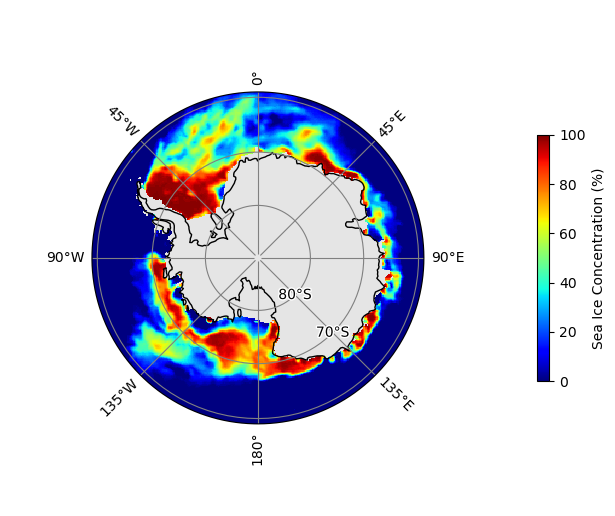

In [31]:

# Create the figure and subplot with SouthPolarStereo projection
fig = plt.figure(figsize=(8, 8), facecolor="w")
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the sea ice extent using pcolormesh
im = ax.pcolormesh(xgrid, ygrid, sea_ice_extent, transform=data_proj, cmap=cmap)

# Set the geographic extent to show the Southern Hemisphere
ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())

# Add coastlines to the plot
ax.coastlines()

# Add gridlines with labels
gl = ax.gridlines(
    draw_labels=True, 
    lw=0.8,  
    color='grey',
    ylabel_style=dict(path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]),
    xlocs=range(-180, 180, 45), 
    ylocs=range(-90, 0, 10),
    y_inline=True,
)

# Circular boundary
r_extent = 2950000
r_extent *= 1.2
circle_path = mpath.Path.unit_circle()
circle_path = mpath.Path(circle_path.vertices.copy() * r_extent, circle_path.codes.copy())
ax.set_boundary(circle_path)

# Add colorbar as a legend
cbar = fig.colorbar(im, ax=ax, shrink=0.4, label='Sea Ice Concentration (%)')